# PCA (Principle Component analysis)

Notebook adapted from Anna Poetsch ([source](https://github.com/BiAPoL/Bio-image_Analysis_with_Python/tree/main/10_correlation_dim_reduction)) under [CC-BY-4.0](https://github.com/BiAPoL/Bio-image_Analysis_with_Python/blob/main/LICENSE-CC-BY)

Source material:   
Tutorial: https://umap-learn.readthedocs.io/en/latest/  
Paper: https://arxiv.org/abs/1802.03426  

Packages (if not available, pip install):

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Load data:

In [2]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins = penguins.dropna()

![lter_penguins.png](./lter_penguins.png)
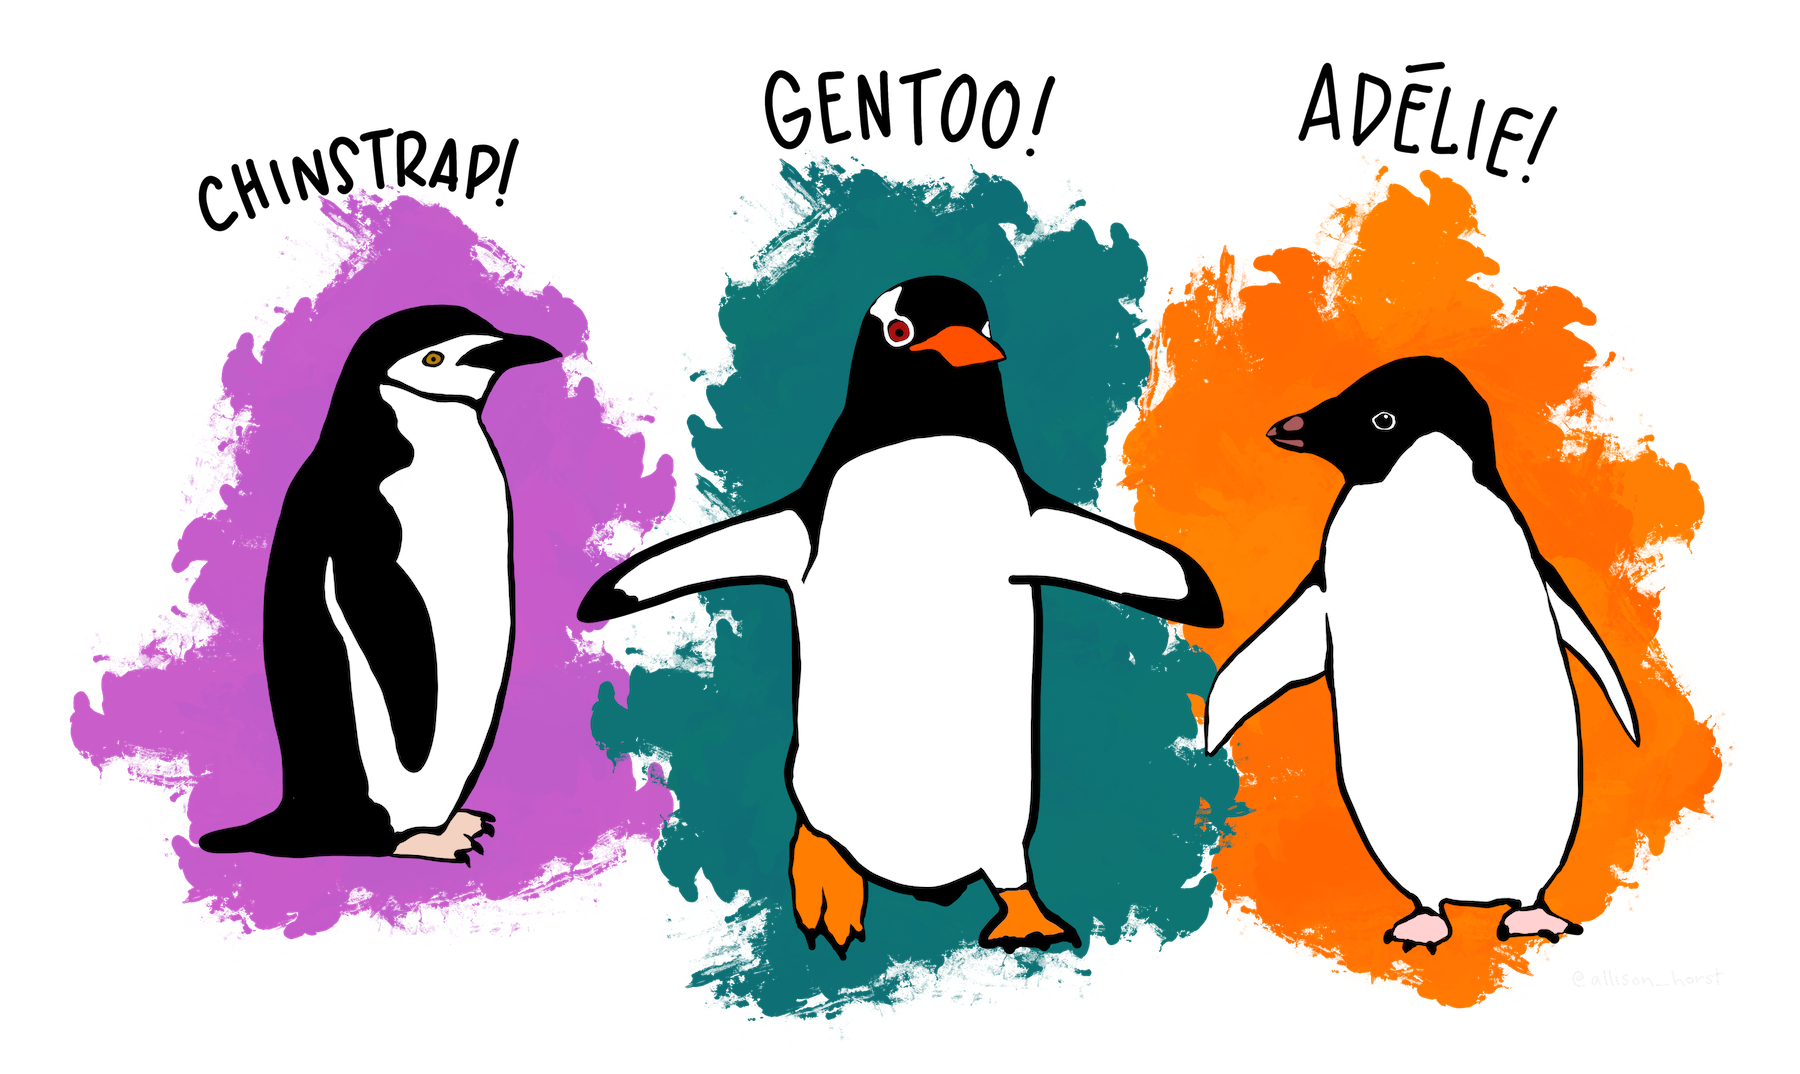

![culmen_depth.png](./culmen_depth.png)
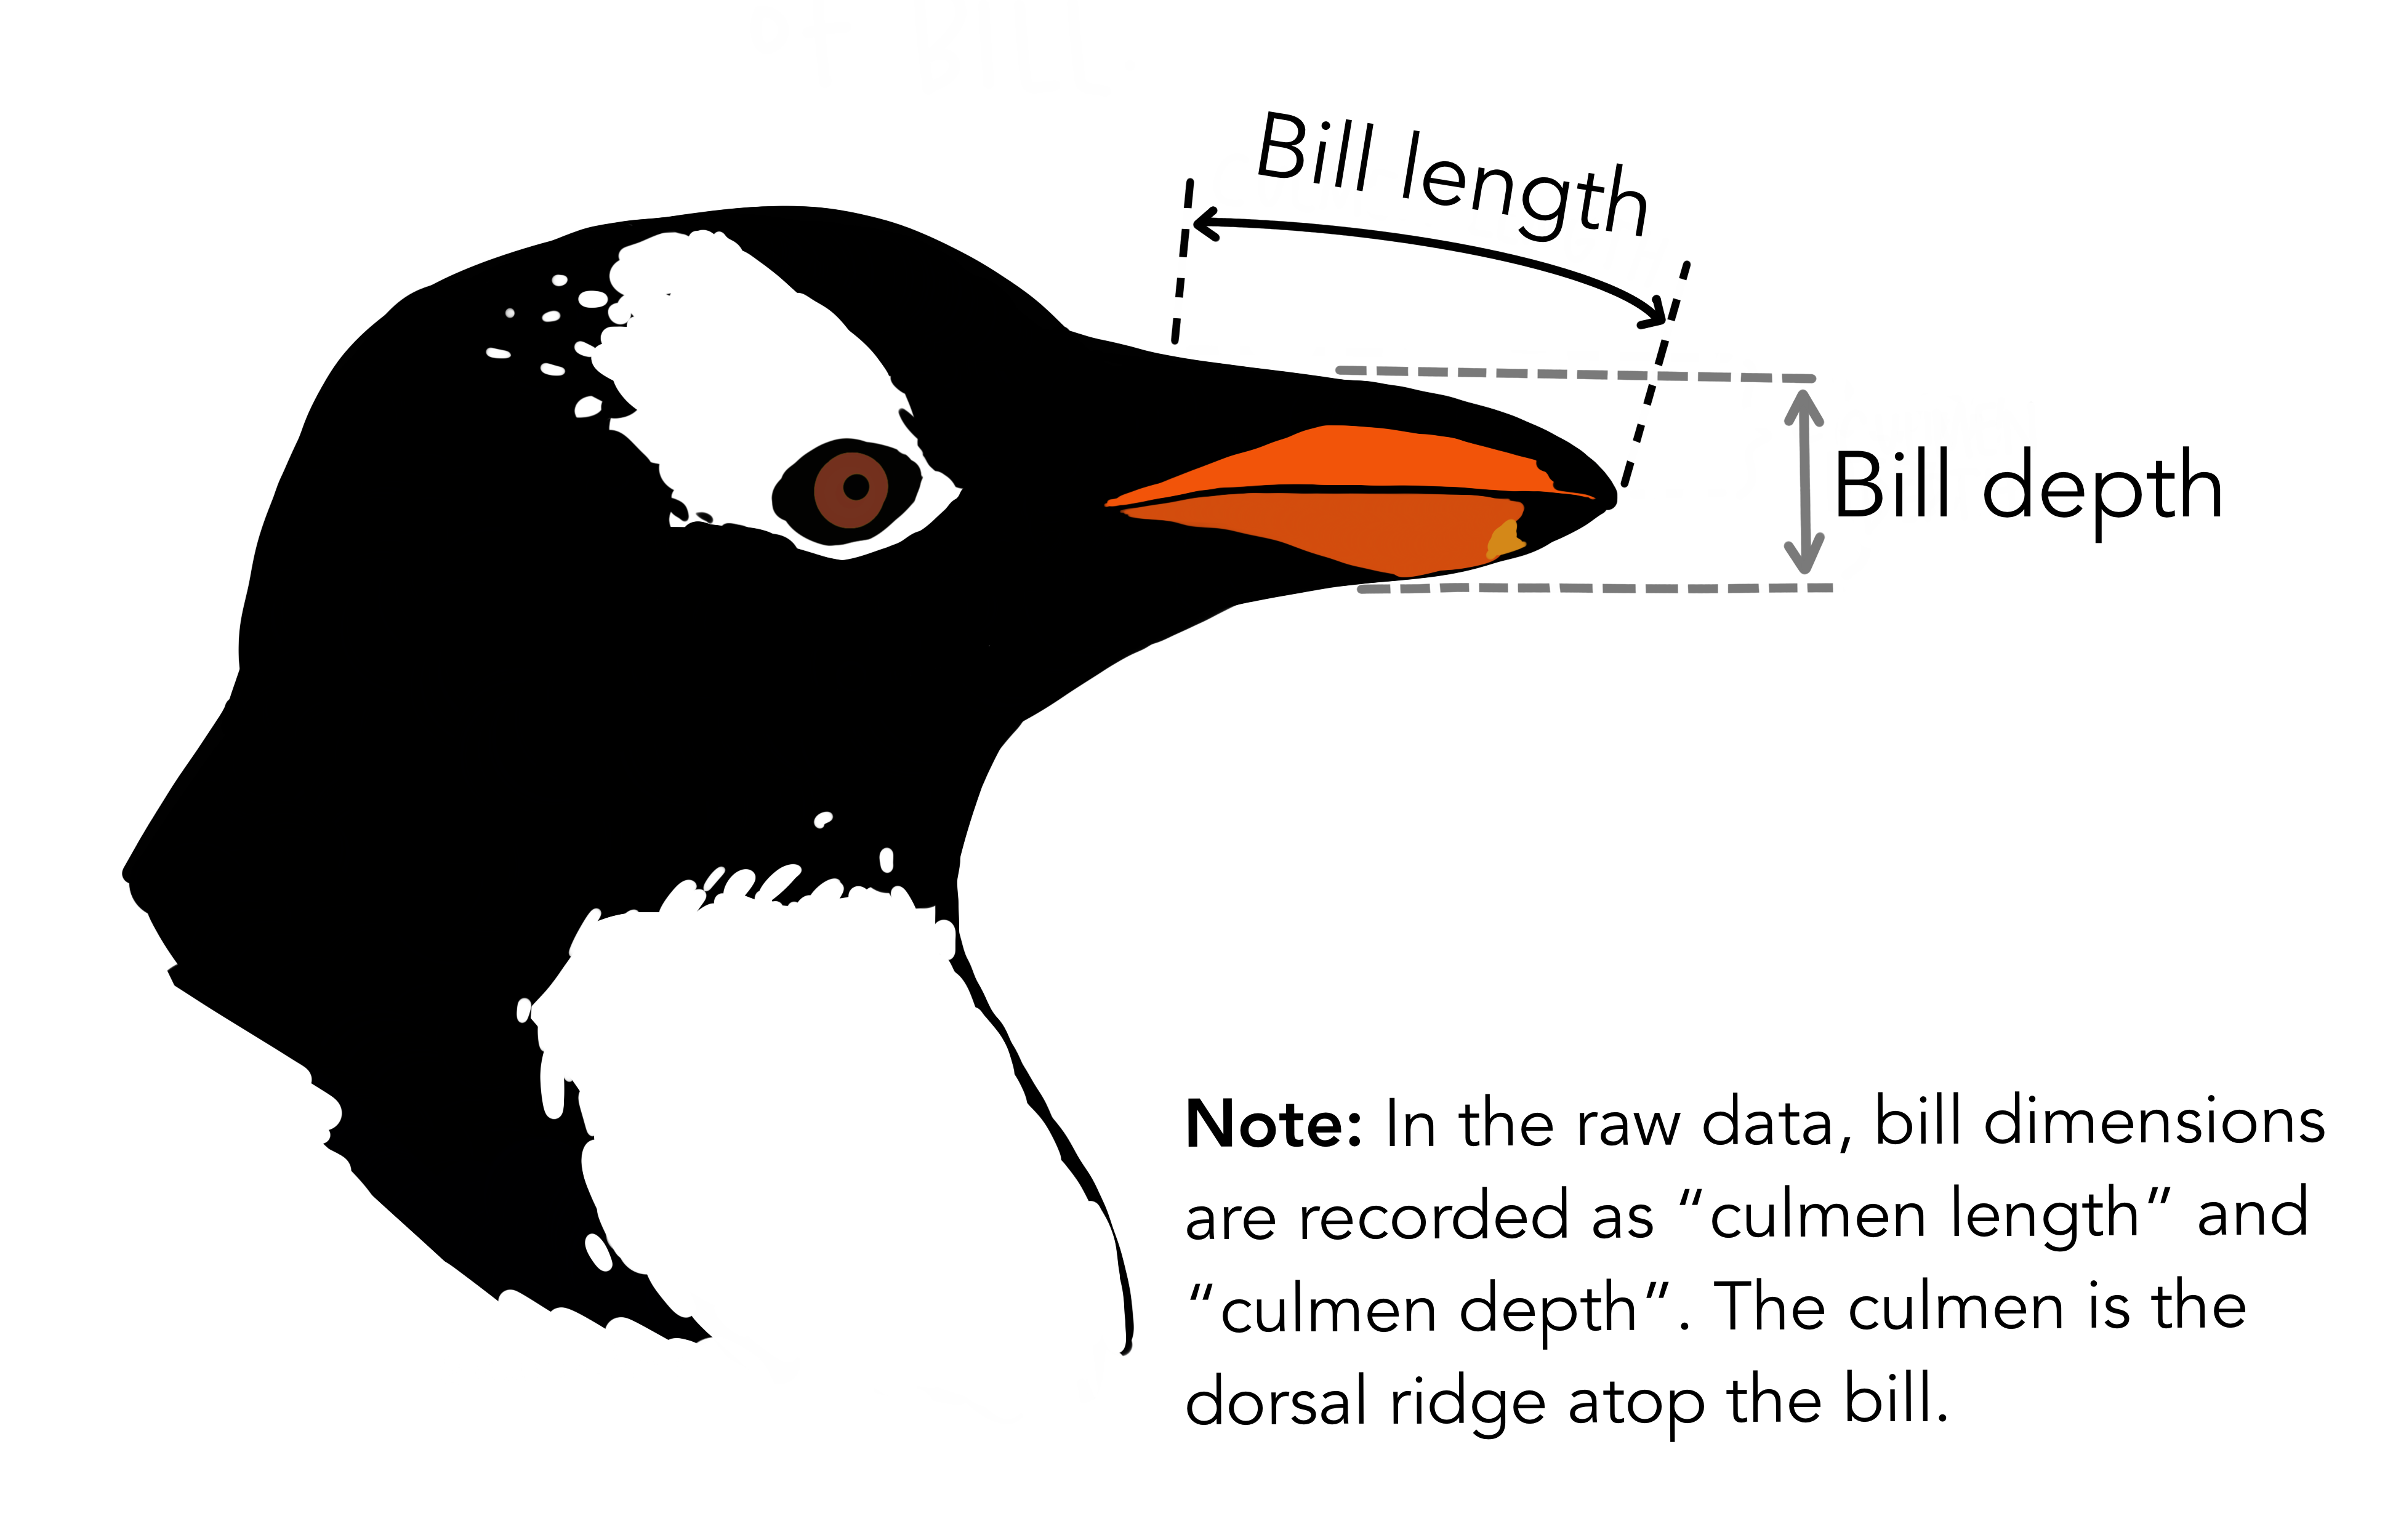

Show data:

In [3]:
penguins.head()

species_short     island  culmen_length_mm  culmen_depth_mm  \
0        Adelie  Torgersen              39.1             18.7   
1        Adelie  Torgersen              39.5             17.4   
2        Adelie  Torgersen              40.3             18.0   
4        Adelie  Torgersen              36.7             19.3   
5        Adelie  Torgersen              39.3             20.6   

   flipper_length_mm  body_mass_g     sex  
0              181.0       3750.0    MALE  
1              186.0       3800.0  FEMALE  
2              195.0       3250.0  FEMALE  
4              193.0       3450.0  FEMALE  
5              190.0       3650.0    MALE

penguins = penguins.dropna()
penguins.species_short.value_counts()

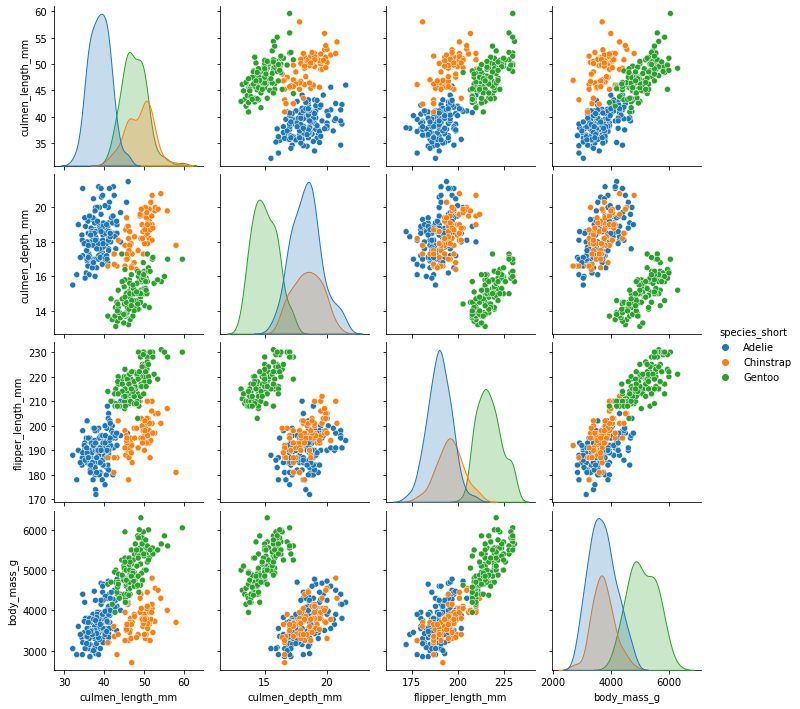

In [4]:
sns.pairplot(penguins, hue='species_short')

## Data scaling
change data format to values:

In [5]:
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values

In [7]:
import umap.umap_ as umap #install with 'pip install umap-learn'
np.random.seed(42) #a seed is defined, because there is a random component to UMAP

In [8]:
reducer = umap.UMAP()

In [9]:
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [10]:
scaled_penguin_data

array([[-0.89765322,  0.78348666, -1.42952144, -0.57122888],
       [-0.82429023,  0.12189602, -1.07240838, -0.50901123],
       [-0.67756427,  0.42724555, -0.42960487, -1.19340546],
       ...,
       [ 1.17485108, -0.74326098,  1.49880565,  1.91747742],
       [ 0.22113229, -1.20128527,  0.78457953,  1.23308319],
       [ 1.08314735, -0.53969463,  0.85600214,  1.48195382]])

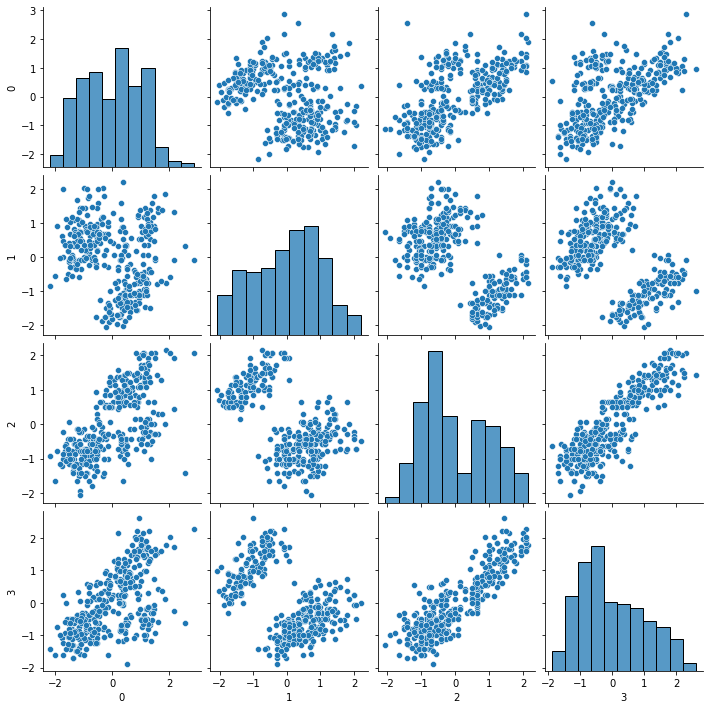

In [11]:
scaled_df = pd.DataFrame(scaled_penguin_data)

sns.pairplot(scaled_df)

## PCA  
Principle component analysis is a linear dimensionality reduction technique, while UMAP is non-linear. Another popular non-linear one is tSNE.

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pen_pca = pca.fit(scaled_penguin_data).transform(scaled_penguin_data)

Show the percentage of variance explained for each components:

In [12]:
print(
    "explained variance ratio: %s"
    % str(pca.explained_variance_ratio_)
)

explained variance ratio: [0.68641678 0.19448404 0.09215558 0.02694359]


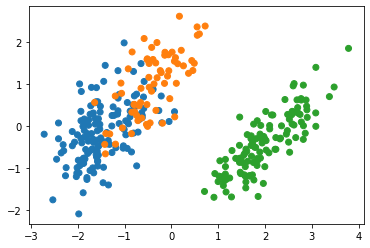

In [12]:
plt.scatter(
    pen_pca[:, 0],
    pen_pca[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.show()

The separation of species with PCA did work, but not very well.